# K-Means Clustering With Simple Dataset

## Libraries

In [54]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd


from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.model_selection import train_test_split

from scipy.cluster.hierarchy import dendrogram, set_link_color_palette

from scipy.stats import shapiro

import random

random.seed(42)


import matplotlib.cm as cm

import matplotlib.colors

import seaborn as sns

from sklearn import preprocessing

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale


## Load customer data

In [55]:

#load dataframe
df = pd.read_csv('../data/customer_shopping_data.csv')

#create a copy as to not alter input frame
customer_frame = df[['age', 'quantity', 'price']]


In [56]:
customer_frame.head(5)

,age,quantity,price
0,28,5,1500.40
1,21,3,1800.51
2,20,1,300.08
3,66,5,3000.85
4,53,4,60.60


## Standardize Dataset

In [57]:
#standardize the dataset

stdData_1 = preprocessing.normalize(customer_frame)

#turn normalized data into a pandas dataframe

std_df_1 = pd.DataFrame(stdData_1, columns = customer_frame.columns)

std_df_1.head(5)

,age,quantity,price
0,0.018658,0.003332,0.999820
1,0.011663,0.001666,0.999931
2,0.066501,0.003325,0.997781
3,0.021988,0.001666,0.999757
4,0.657518,0.049624,0.751803


## Pearson Correlation Analysis

The variables age and quantity are highly correlated. Normally, I would remove one or the other but the business direction is to keep both. How do I build I good model with highly correlated variables?

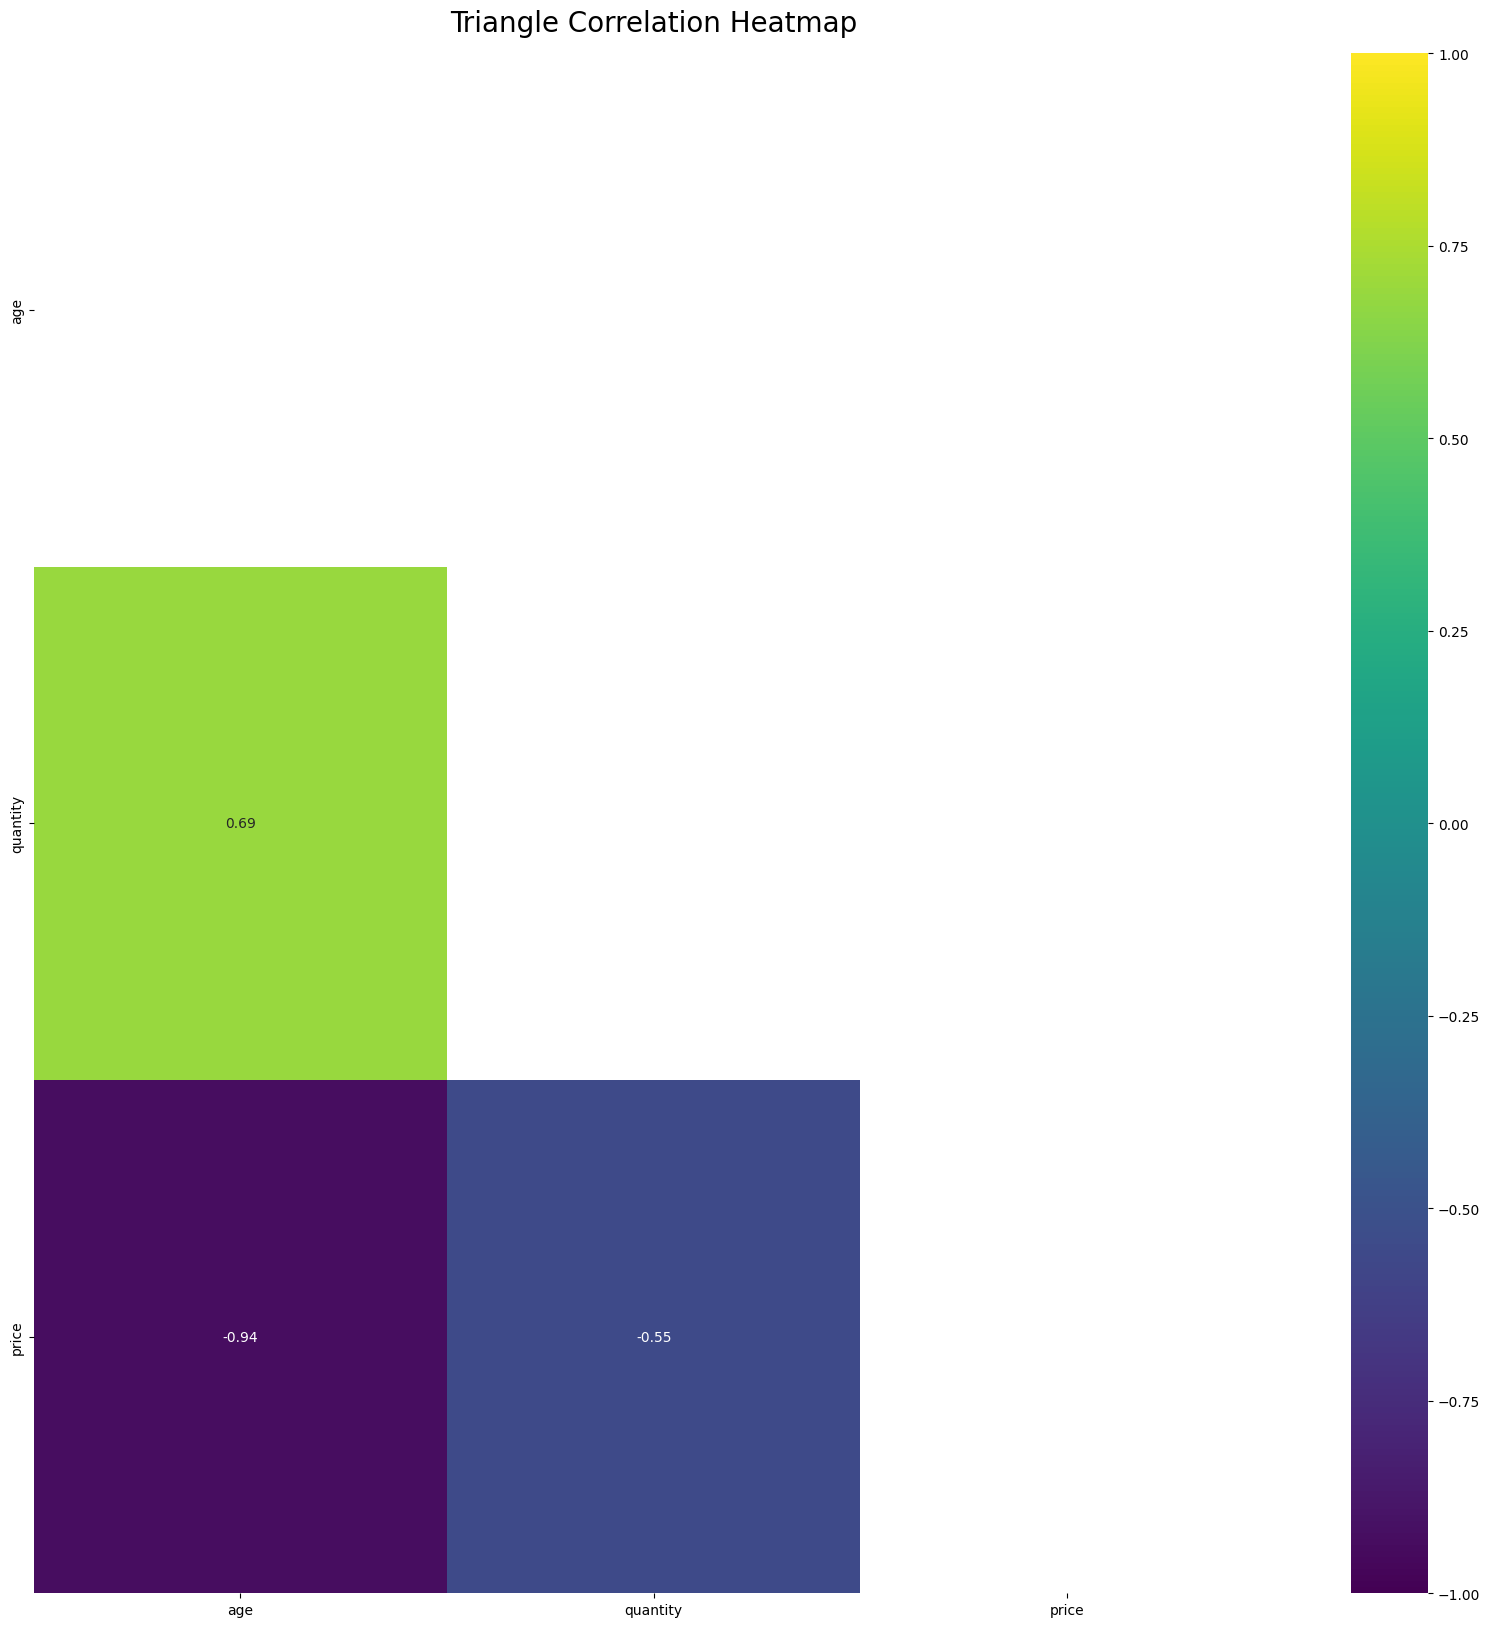

In [58]:
corr = std_df_1.corr()

plt.figure(figsize=(20, 20))

mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin= -1, vmax= 1, annot=True, cmap='viridis')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=16)
plt.show()

## PCA Analysis

I will remove the correlation between the variables by using PCA

In [59]:
model = PCA()

model.fit(std_df_1)

transformed = model.transform(std_df_1)

values = model.explained_variance_ratio_

The elbow graph indicates two PCAs components would explain the most variance in the dataset.

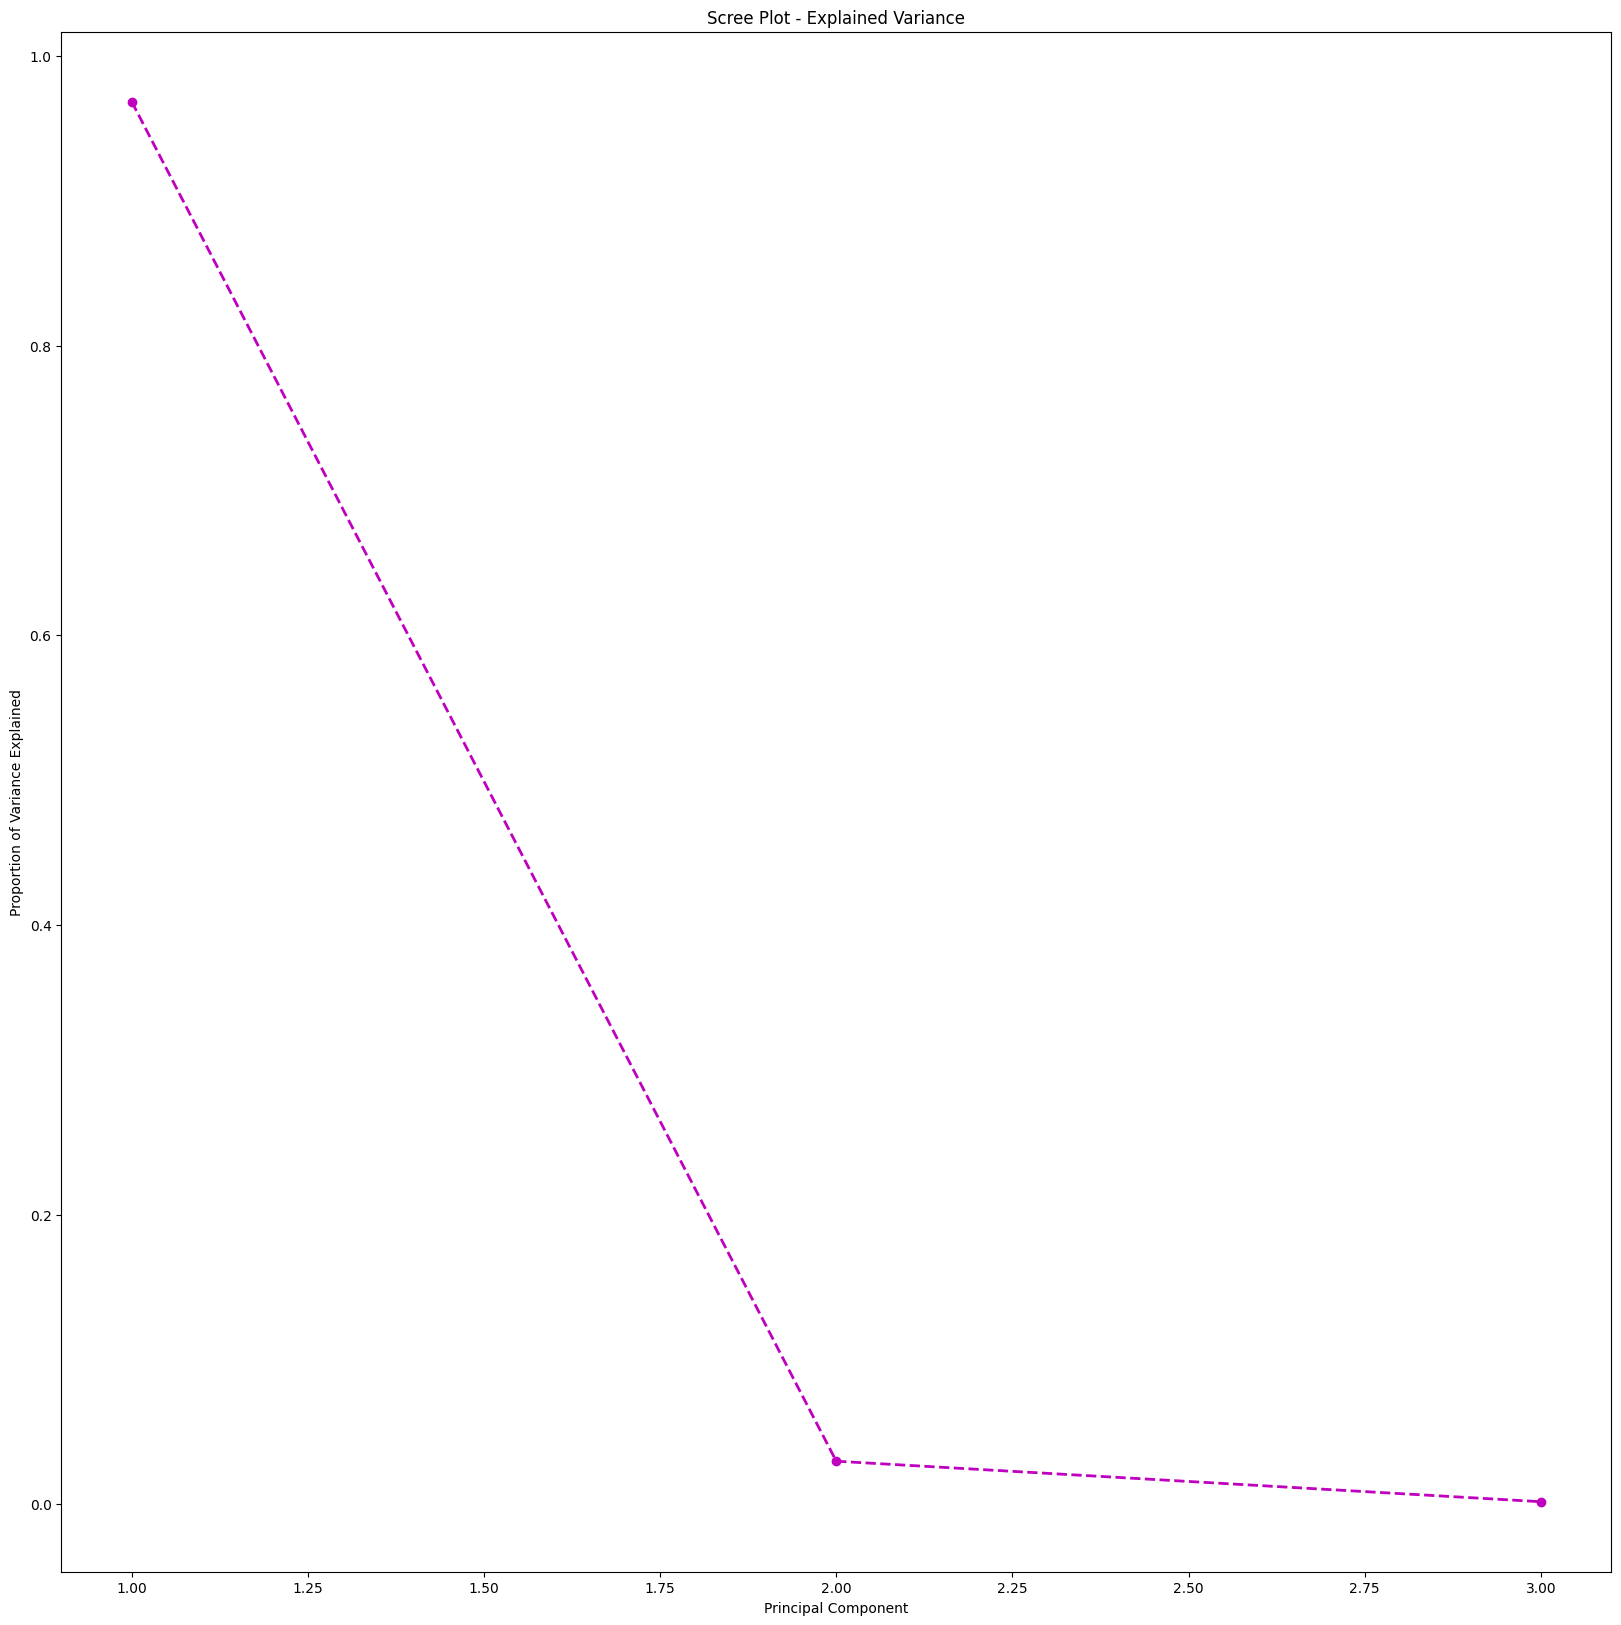

In [60]:
plt.figure(figsize=(20,20))
plt.plot(range(1,4), values, linewidth = 2, linestyle = '--', color = 'm', marker = 'o')
plt.title('Scree Plot - Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

PCA components calculated below

In [61]:
pca = PCA(n_components= 2)

pca.fit(std_df_1)

pca_values = pca.transform(std_df_1)

seg_kmeans_pca = pd.DataFrame(pca_values)

## K-Means

K-Means Using Eigenvectors to overcome highly correlated variables

The suggested number of clusters is 2

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


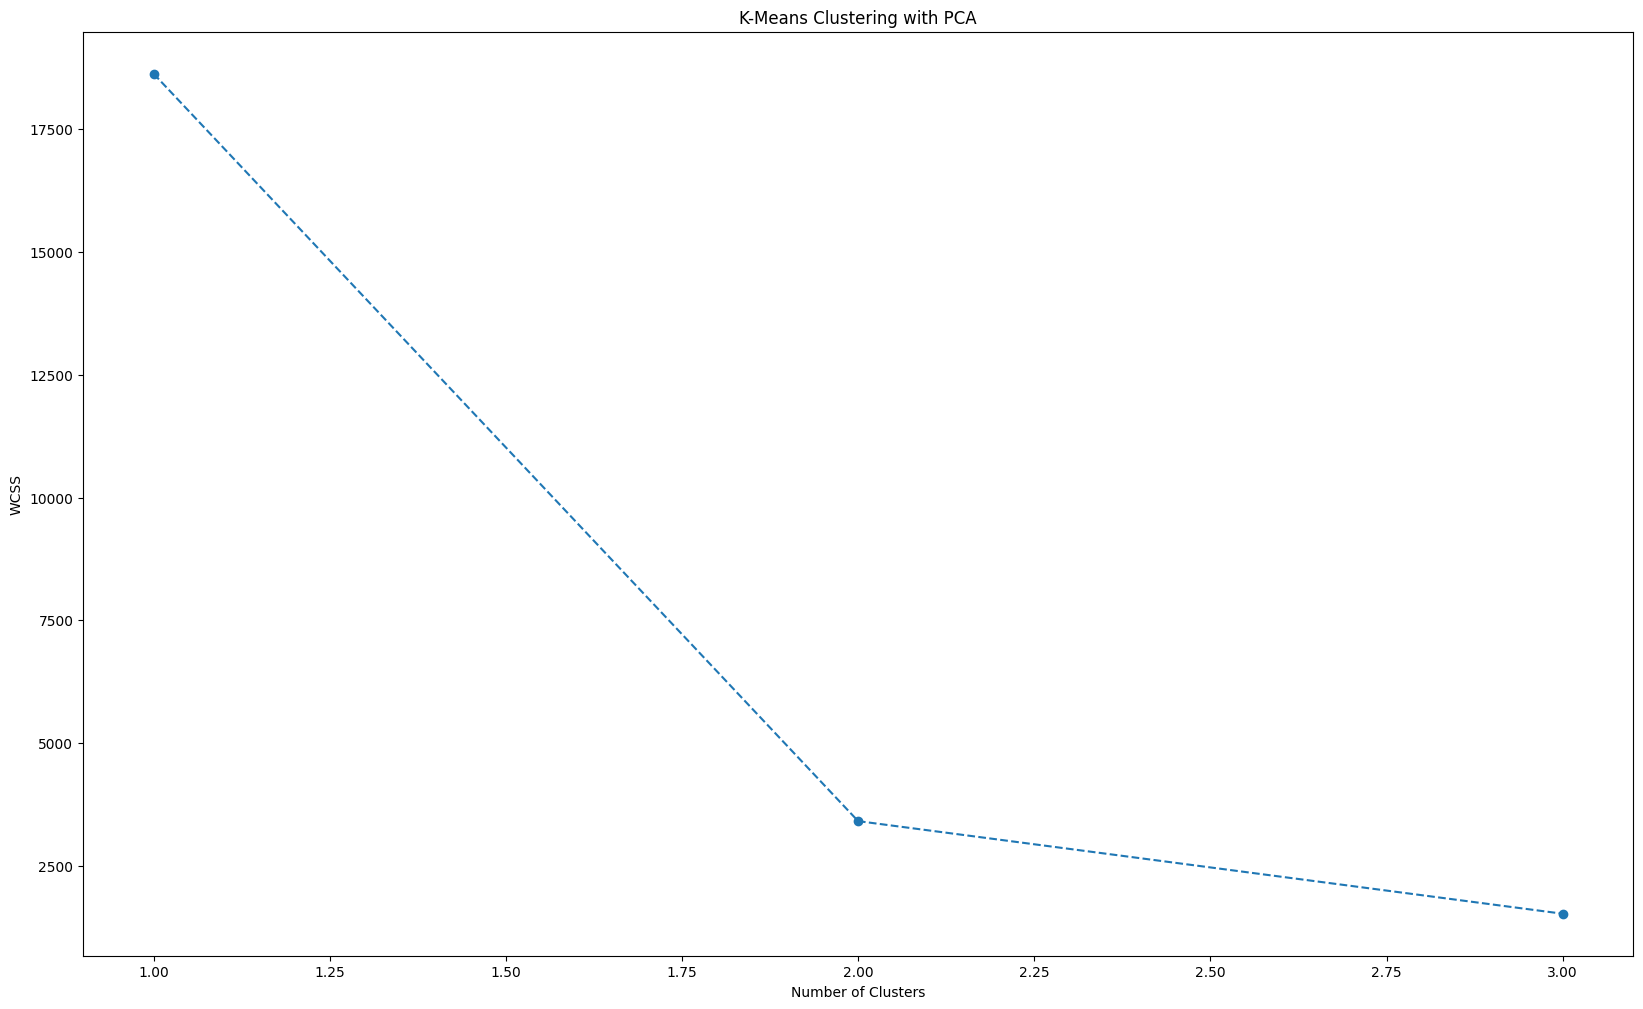

In [62]:
wcss_1 = []

for i in range(1,4):

    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_values)
    wcss_1.append(kmeans_pca.inertia_)


plt.figure(figsize=(20, 12))

plt.plot(range(1, 4), wcss_1, marker= 'o', linestyle = '--')

plt.xlabel('Number of Clusters')

plt.ylabel('WCSS')

plt.title('K-Means Clustering with PCA')

plt.show()

In [63]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)

kmeans_pca.fit(pca_values)


##append segments to the PCs

seg_kmeans_pca['k_means_pca_seg'] = kmeans_pca.labels_



seg_kmeans_pca.head(5)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,k_means_pca_seg
0,-0.353398,0.053179,0
1,-0.359197,0.057349,0
2,-0.313474,0.027298,0
3,-0.350736,0.051548,0
4,0.310977,-0.121056,1


## Cluster Visualization

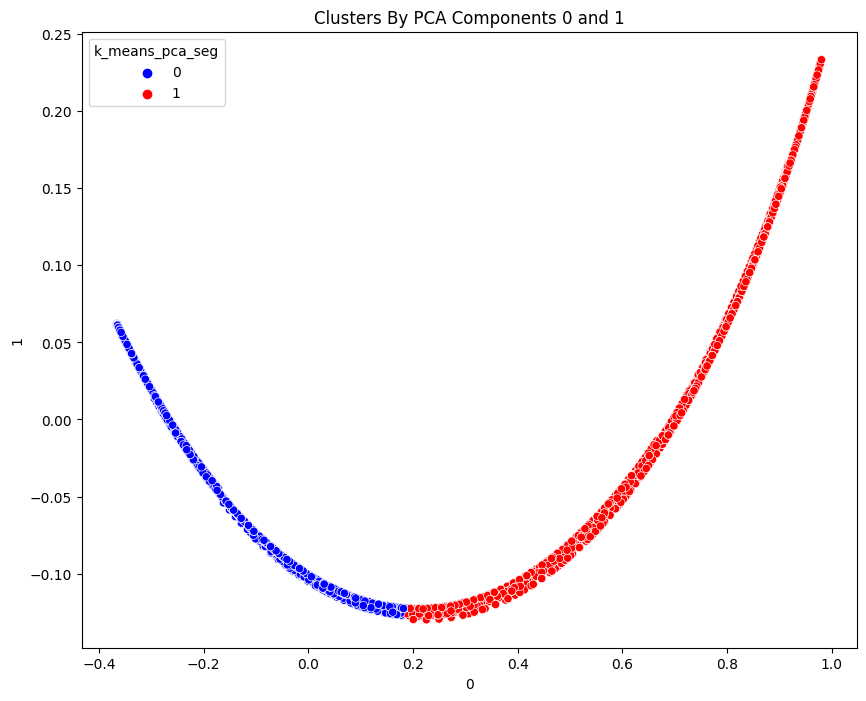

In [64]:
x_axis = seg_kmeans_pca[0]
y_axis = seg_kmeans_pca[1]

plt.figure(figsize=(10, 8))

sns.scatterplot(x = x_axis, y=  y_axis, hue = seg_kmeans_pca['k_means_pca_seg'], palette = ['b', 'r'])

plt.title('Clusters By PCA Components 0 and 1')

plt.show()